In [156]:
import os
import re
import aocd
import string
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
from aocd import submit
import pprint

# based on https://www.reddit.com/r/adventofcode/comments/18luw6q/2023_day_17_a_longform_tutorial_on_day_17/

#Part 1
data = aocd.get_data(day=17, year=2023).split('\n')

In [146]:
data = """2413432311323
3215453535623
3255245654254
3446585845452
4546657867536
1438598798454
4457876987766
3637877979653
4654967986887
4564679986453
1224686865563
2546548887735
4322674655533""".split('\n')

<AxesSubplot:>

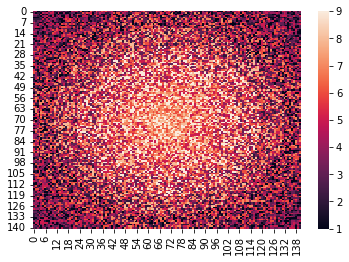

In [157]:
_map = np.array([[int(x) for x in y] for y in data])
sns.heatmap(_map)

In [158]:
directions = {'U':(-1,0),'D':(1,0),'L':(0,-1),'R':(0,1)}

def get_valid_next_steps(pos, direction, direction_count, map_shape, part=1):
    max_rows, max_cols = map_shape[0] - 1, map_shape[1] - 1
    
    valid_directions = ['D','U','L','R']
    if direction == 'U':
        valid_directions = ['U','L','R']
    if direction == 'D':
        valid_directions = ['D','L','R']
    if direction == 'L':
        valid_directions = ['U','L','D']
    if direction == 'R':
        valid_directions = ['U','D','R']
        
    if (pos[0] == 0) & ('U' in valid_directions):
        valid_directions.remove('U')
    if (pos[1] == 0) & ('L' in valid_directions):
        valid_directions.remove('L')
    if (pos[0] == max_rows) & ('D' in valid_directions):
        valid_directions.remove('D')
    if (pos[1] == max_cols) & ('R' in valid_directions):
        valid_directions.remove('R')
    
    #print(valid_directions)
    next_steps = []
    for next_direction in valid_directions:
        next_direction_count = direction_count
        if next_direction == direction:
            next_direction_count += 1
        else:
            next_direction_count = 1
        if part == 1:
            if next_direction_count < 4:
                next_pos = tuple(np.array(pos) + np.array(directions[next_direction]))
                next_steps += [(next_pos, next_direction, next_direction_count)]
                
        elif part == 2:
            if direction == next_direction:
                if next_direction_count <= 10:
                    next_pos = tuple(np.array(pos) + np.array(directions[next_direction]))
                    next_steps += [(next_pos, next_direction, next_direction_count)]
            elif direction != next_direction:
                if direction_count >= 4:
                    next_pos = tuple(np.array(pos) + np.array(directions[next_direction]))
                    next_steps += [(next_pos, next_direction, next_direction_count)]

    return next_steps

get_valid_next_steps((11,11),'D',5,[13,13], part=2)    

[((12, 11), 'D', 6), ((11, 10), 'L', 1), ((11, 12), 'R', 1)]

In [159]:
start=(0,0)
start_dir=None 
direction_count=-1
current_cost=0
visited={((0,0), start_dir, direction_count ):0} 
goal=(_map.shape[0]-1,_map.shape[1]-1)
part = 2
    
    
q = {0: [{'position':start, 'current_dir':start_dir, 'direction_count':direction_count, 'path':[start]}]}
# part 2
q = {_map[0,1]: [{'position':(0,1), 'current_dir':'R', 'direction_count':1, 'path':[(0,0),(0,1)]}],
     _map[1,0]: [{'position':(1,0), 'current_dir':'D', 'direction_count':1, 'path':[(0,0),(1,0)]}]}

visited={((0,0), start_dir, direction_count ):0,
        ((0,1), 'R',1):_map[0,1],
        ((1,0),'D',1):_map[1,0]} 

while len(q):
    cost = min(q.keys())
    possible = q.pop(cost)
    #print('\n',cost,possible)
    for cur in possible:
        pos = cur['position']
        direction = cur['current_dir']
        direction_count = cur['direction_count']
        path = cur['path']

        if (pos == (np.array(goal))).all():
            if part == 1:
                print('Found Goal at Cost: ', cost)
                wtf
            if part == 2:
                if direction_count >= 4:
                    print('Found Goal at Cost: ', cost)
                    wtf
                else:
                    continue
                    


        next_possible_steps = get_valid_next_steps(pos, direction, direction_count, _map.shape, part=part)
        for step in next_possible_steps:
            next_pos, next_direction, next_direction_count = step

            step_cost = _map[next_pos]
            #if path == [(0, 0), (0, 1), (0, 2)]:
            #    wtf
            if (step not in visited) or (visited[step] > (cost + step_cost)):
                visited[step] = cost + step_cost
                
                q.setdefault(cost + step_cost, []).append({'position':next_pos, 
                       'current_dir':next_direction, 
                       'direction_count':next_direction_count, 
                       'path':path + [next_pos]})
q

Found Goal at Cost:  1027


NameError: name 'wtf' is not defined

(<matplotlib.image.AxesImage at 0x7fb7914fc430>, 1027)

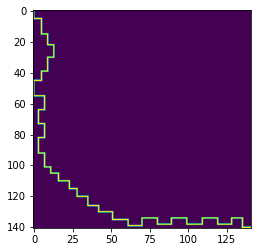

In [160]:
path_map = np.zeros(_map.shape)
_sum = -_map[0,0]
for p in path:
    path_map[p] = 1
    _sum += _map[p]
plt.imshow(path_map), _sum